

1. **Load Input Image:**
   - We start by loading an input image using a library such as PIL (Python Imaging Library) and converting it to grayscale if necessary.

2. **Fourier Transform:**
   - We perform a Fourier transform on the input image. The Fourier transform converts an image from its spatial domain (pixel values) to its frequency domain (frequency components).

3. **Ideal Low-Pass Filter:**
   - An ideal low-pass filter allows frequencies below a specified cutoff frequency to pass through, while attenuating all frequencies above the cutoff frequency to zero. We create a 2D mask representing the filter's frequency response.

4. **Ideal High-Pass Filter:**
   - An ideal high-pass filter allows frequencies above a specified cutoff frequency to pass through, while attenuating all frequencies below the cutoff frequency to zero. We create a 2D mask representing the filter's frequency response, which is the inverse of the low-pass filter's mask.

5. **Applying Filters:**
   - We multiply the Fourier transformed image with the respective low-pass and high-pass filter masks to filter out the desired frequency components.

6. **Inverse Fourier Transform:**
   - After filtering in the frequency domain, we perform an inverse Fourier transform to convert the filtered image back to the spatial domain.

7. **Displaying Results:**
   - We use matplotlib to display various components of the filtering process, including the original image, Fourier spectrum, filtered images (low-pass and high-pass), and the reconstructed image after inverse Fourier transform.

8. **Kernel Display:**
   - To visualize the filter kernels, we add an additional subplot to display the low-pass and high-pass filter masks. This helps in understanding which frequencies are retained or removed by the filters.

These steps provide a comprehensive overview of how we process and filter images using Fourier transforms and ideal filters. However, it's important to note that ideal filters are theoretical constructs and not practical for real-world applications due to various limitations. Real-world filters often use approximations of ideal filters with trade-offs between sharpness and frequency response.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from PIL import Image

In [7]:
def ideal_low_pass_filter(shape, cutoff):
    """Creates an ideal low-pass filter."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    return mask


In [8]:
def ideal_high_pass_filter(shape, cutoff):
    """Creates an ideal high-pass filter."""
    return 1 - ideal_low_pass_filter(shape, cutoff)

In [9]:
# Load the input image
input_image = Image.open("/content/among.png").convert("L")  # Convert to grayscale if needed
input_array = np.array(input_image)

In [10]:
# Perform Fourier transform
f_transform = fftpack.fft2(input_array)
f_transform_shifted = fftpack.fftshift(f_transform)

In [11]:
# Define cutoff frequency and create filters
cutoff_frequency = 30  # Adjust as needed
lpf_filter = ideal_low_pass_filter(input_array.shape, cutoff_frequency)
hpf_filter = ideal_high_pass_filter(input_array.shape, cutoff_frequency)

In [12]:
# Apply filters to the Fourier transformed image
f_transform_lpf = f_transform_shifted * lpf_filter
f_transform_hpf = f_transform_shifted * hpf_filter


In [13]:
# Inverse Fourier transform to get the filtered images
filtered_image_lpf = np.abs(fftpack.ifft2(fftpack.ifftshift(f_transform_lpf)))
filtered_image_hpf = np.abs(fftpack.ifft2(fftpack.ifftshift(f_transform_hpf)))

In [14]:

# Plotting the results
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

(-0.5, 203.5, 247.5, -0.5)

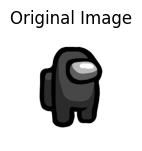

In [15]:
# Original Image
plt.subplot(3, 3, 1)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')


(-0.5, 203.5, 247.5, -0.5)

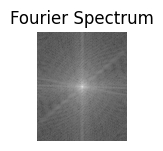

In [16]:
# Fourier Spectrum
plt.subplot(3, 3, 2)
plt.imshow(np.log(1 + np.abs(f_transform_shifted)), cmap='gray')
plt.title('Fourier Spectrum')
plt.axis('off')


(-0.5, 203.5, 247.5, -0.5)

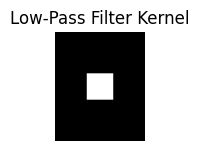

In [22]:
plt.subplot(3, 3, 9)
plt.imshow(lpf_filter, cmap='gray')
plt.title('Low-Pass Filter Kernel')
plt.axis('off')


(-0.5, 203.5, 247.5, -0.5)

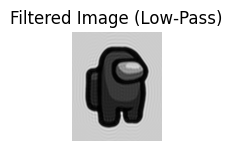

In [17]:
# Low-pass filtered image
plt.subplot(3, 3, 4)
plt.imshow(filtered_image_lpf, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

(-0.5, 203.5, 247.5, -0.5)

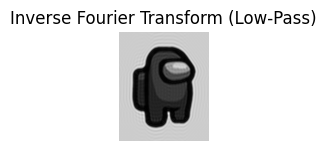

In [18]:
# Inverse Fourier Transform of Low-pass filtered image
plt.subplot(3, 3, 5)
plt.imshow(np.abs(fftpack.ifft2(fftpack.ifftshift(f_transform_lpf))), cmap='gray')
plt.title('Inverse Fourier Transform (Low-Pass)')
plt.axis('off')

(-0.5, 203.5, 247.5, -0.5)

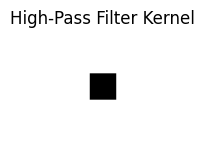

In [23]:
plt.subplot(3, 3, 9)
plt.imshow(hpf_filter, cmap='gray')
plt.title('High-Pass Filter Kernel')
plt.axis('off')


(-0.5, 203.5, 247.5, -0.5)

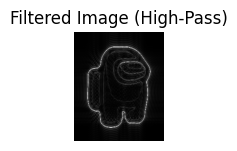

In [19]:
# High-pass filtered image
plt.subplot(3, 3, 7)
plt.imshow(filtered_image_hpf, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')


(-0.5, 203.5, 247.5, -0.5)

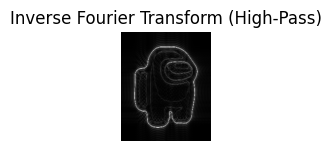

In [20]:
# Inverse Fourier Transform of High-pass filtered image
plt.subplot(3, 3, 8)
plt.imshow(np.abs(fftpack.ifft2(fftpack.ifftshift(f_transform_hpf))), cmap='gray')
plt.title('Inverse Fourier Transform (High-Pass)')
plt.axis('off')


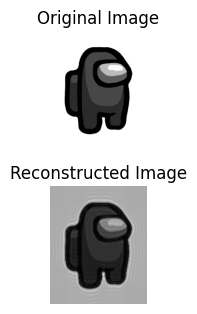

In [21]:

# Original vs Reconstructed
plt.subplot(3, 3, 3)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(filtered_image_lpf + filtered_image_hpf, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
